Linear Regression MSE: 0.25, R-squared: -0.00


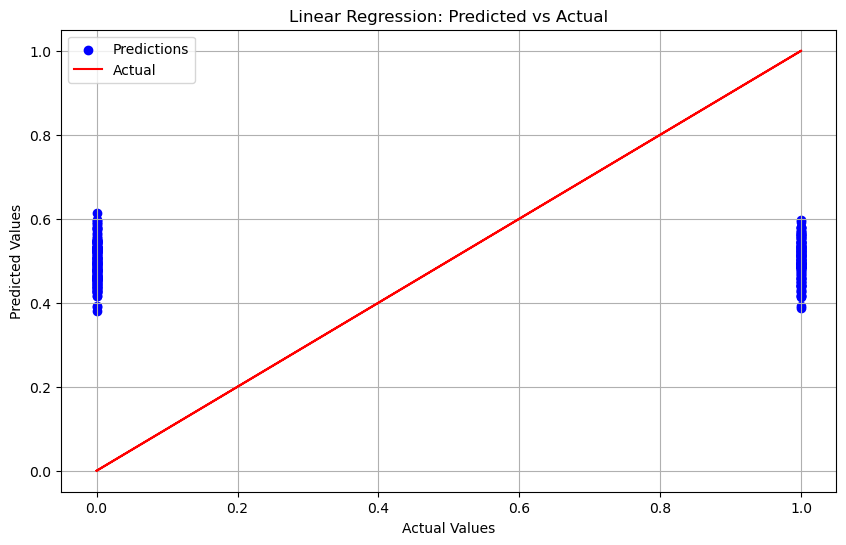

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset (adjusting the path)
data = pd.read_csv(r'C:\Users\ganes\Desktop\Python\PatientDataa.csv')
X = data[['Blood_sugar_level', 'Blood_Pressure_Level', 'Cholesterol', 'Age']]  # Features
y = data['Has_disease']  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Linear Regression MSE: {mse:.2f}, R-squared: {r2:.2f}")

# Plot predictions vs actual
plt.figure(figsize=(10, 6))

plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', linestyle='-', label='Actual')

plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Decision Tree MSE: 0.48, R-squared: -0.94


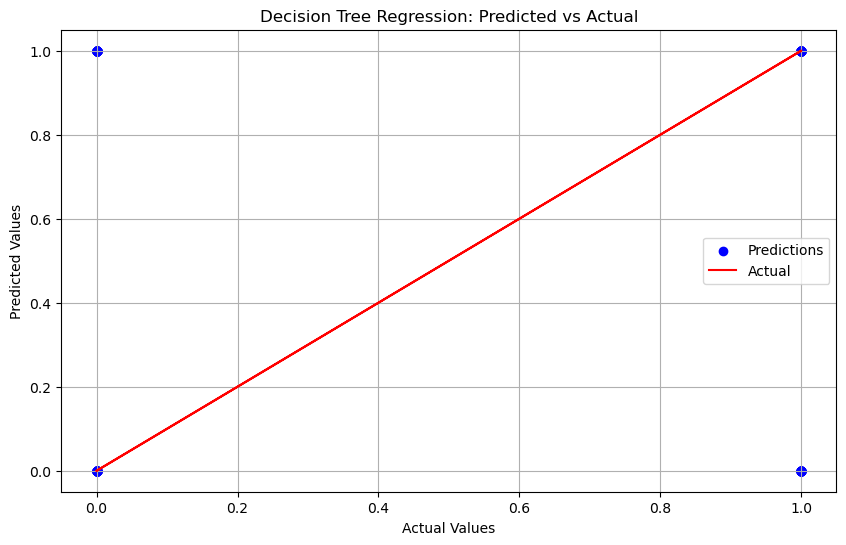

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset (adjusting the path)
data = pd.read_csv(r'C:\Users\ganes\Desktop\Python\PatientDataa.csv')
X = data[['Blood_sugar_level', 'Blood_Pressure_Level', 'Cholesterol', 'Age']]  # Features
y = data['Has_disease']  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Decision Tree MSE: {mse:.2f}, R-squared: {r2:.2f}")

# Plot predictions vs actual
plt.figure(figsize=(10, 6))

plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', linestyle='-', label='Actual')

plt.title('Decision Tree Regression: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


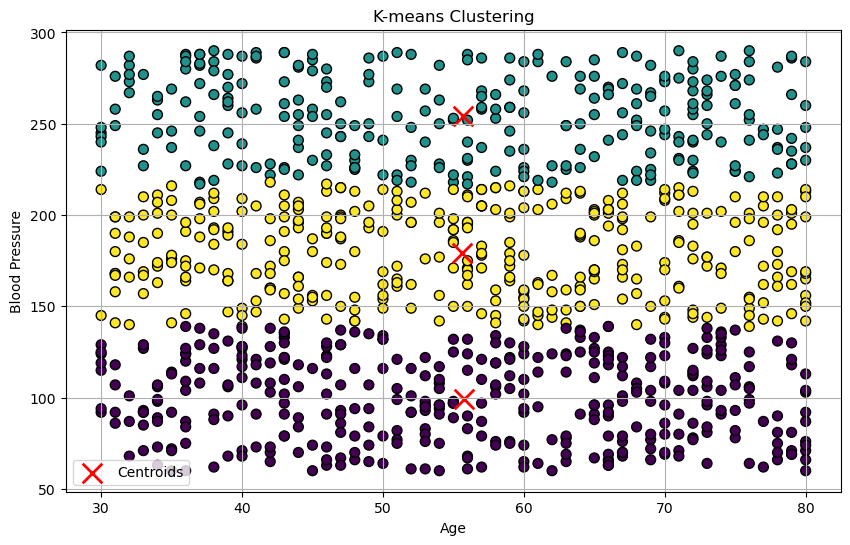

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset (adjusting the path)
data = pd.read_csv(r'C:\Users\ganes\Desktop\Python\PatientDataa.csv')
X = data[['Blood_sugar_level', 'Blood_Pressure_Level', 'Cholesterol', 'Age']]  # Features

# Initialize KMeans with the number of clusters (adjust as needed)
k = 3  # Example: Using 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans model
kmeans.fit(X)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters (using 2D PCA for visualization)
# Note: Adjust visualization based on the number of dimensions in your data
plt.figure(figsize=(10, 6))

plt.scatter(X.iloc[:, 3], X.iloc[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)  
plt.scatter(centroids[:, 3], centroids[:, 1], marker='x', color='red', s=200, linewidths=2, label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


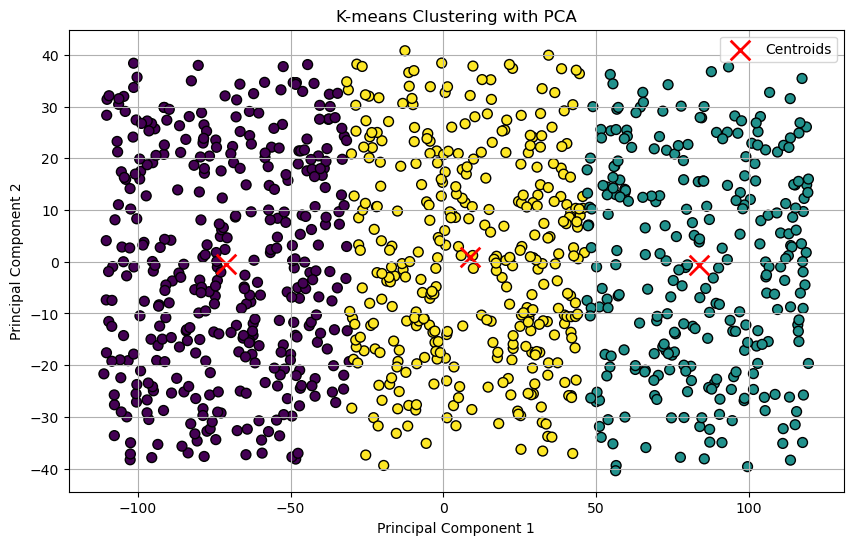

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset (adjusting the path)
data = pd.read_csv(r'C:\Users\ganes\Desktop\Python\PatientDataa.csv')
X = data[['Blood_sugar_level', 'Blood_Pressure_Level', 'Cholesterol', 'Age']]  # Features

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Initialize KMeans with the number of clusters (adjust as needed)
k = 3  # Example: Using 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans model on PCA-transformed data
kmeans.fit(X_pca)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(10, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, linewidths=2, label='Centroids')

plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
import numpy as np
# Rewards: +1 for reaching the goal (s8), -1 for falling into a pit (s7), 0 otherwise

# Q-table initialization (9 states x 4 actions)
Q = np.zeros((9, 4))  # Q[state, action]

# Define the rewards
rewards = np.array([-1, -1, -1, -1, 0, -1, -1, -1, 1])

# Define the transition matrix (state transitions based on actions)
# Assume a deterministic environment for simplicity
T = np.array([
    [-1, 3, -1, 1],  # s0: up, down, left, right
    [-1, 4, 0, 2],   # s1: up, down, left, right
    [-1, 5, 1, -1],  # s2: up, down, left, right
    [0, 6, -1, 4],   # s3: up, down, left, right
    [1, 7, 3, 5],    # s4: up, down, left, right
    [2, 8, 4, -1],   # s5: up, down, left, right
    [3, -1, -1, 7],  # s6: up, down, left, right
    [4, -1, 6, 8],   # s7: up, down, left, right
    [5, -1, 7, -1]   # s8: up, down, left, right (goal state)
])

# Define Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration-exploitation trade-off

# Q-learning algorithm
num_episodes = 1000

for episode in range(num_episodes):
    state = 0  # Starting state (s0)
    
    while state != 8:  # Continue until reaching the goal state (s8)
        # Epsilon-greedy policy to choose action
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(0, 4)  # Explore: choose random action
        else:
            action = np.argmax(Q[state])  # Exploit: choose action with max Q-value
        
        # Perform action and observe next state and reward
        next_state = T[state, action]
        reward = rewards[next_state]
        
        # Q-value update
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        
        # Move to next state
        state = next_state

# Print the learned Q-table
print("Learned Q-table:")
print(Q)


Learned Q-table:
[[10.          5.56975549  9.11363863  5.30566681]
 [ 9.20233557  0.          0.          0.        ]
 [ 7.20394759  0.          0.          1.        ]
 [ 1.50968804 -0.1         9.24312356  0.        ]
 [ 0.64090536  7.62317321  0.          0.        ]
 [ 2.52990474 10.          3.57318219  7.71232075]
 [ 0.14970428  6.85890341  0.          0.        ]
 [ 5.07235628  7.94108867  2.06574985 10.        ]
 [ 8.         10.          8.         10.        ]]


In [ ]:
--